# **"Analyzing the Impact of Age and Smoking on US Health Insurance Premiums "**

**By Michael Hamaty, Man Ngo and Khushi Kathait**

By analyzing this dataset, we hope to find the correlation between individuals insurance premiums, their age, and whether they smoke or not.

**Age**

$H_o$: There is no significant difference in the mean insurance premium between people equal to or younger than 30 years old and older than 30 years old.

$H_a$: There is a significant difference in the mean insurance premium between people equal to or younger than 30 years old and older than 30 years old.

**Smoking**

$H_o$: There is no significant difference in mean insurance premiums between smokers and non-smokers.

$H_a$: There is a significant difference in mean insurance premiums between smokers and non-smokers.

In [ ]:
import pandas as pd
import numpy as np
import math as math
import random as rng
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
from scipy.stats import ttest_ind
from scipy import stats

#**Smoking Impact on Premium Cost Analysis**

$H_o$: There is no significant difference in mean insurance premiums between smokers and non-smokers.

$H_a$: There is a significant difference in mean insurance premiums between smokers and non-smokers.

In [ ]:

url = 'https://raw.githubusercontent.com/csbfx/cs22a/main/us_health_insurance.csv'

df = pd.read_csv(url)
df


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# Subsetting df for smokers
smokers = df[df.filter(like='smoker')['smoker'] == 'yes']
smokers.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
11,62,female,26.29,0,yes,southeast,27808.7251
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768


In [ ]:
# Subsetting df for nonsmokers
non_smokers = df[df.filter(like='smoker')['smoker'] == 'no']
non_smokers.head()

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


In [ ]:
#Calculating mean and standard deviation
charges_mean = df['charges'].mean()
charges_std = df['charges'].std()

print(f'The mean charges of US health insurance is:', round(charges_mean, 2))
print(f'The standard deviation of US health insurane costs is:', round(charges_std, 2))

The mean charges of US health insurance is: 13270.42
The standard deviation of US health insurane costs is: 12110.01


In [ ]:
smean = round(smokers['charges'].mean(),2)
sstd = round(smokers['charges'].std(),2)
nsmean = round(non_smokers['charges'].mean(),2)
nsstd = round(non_smokers['charges'].std(),2)

print(f'The mean and STD of smokers are {smean, sstd}','respectively.','The mean and STD of nonsmokers are', {nsmean, nsstd}, 'respectivly.' )

The mean and STD of smokers are (32050.23, 11541.55) respectively. The mean and STD of nonsmokers are {5993.78, 8434.27} respectivly.


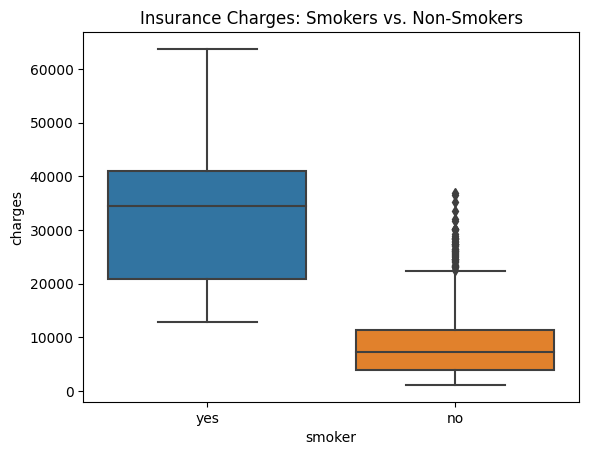

In [ ]:
#Creating the relpot for smokers and insurance charges


sns.boxplot(x='smoker', y='charges', data=df).set(title='Insurance Charges: Smokers vs. Non-Smokers')
plt.show()

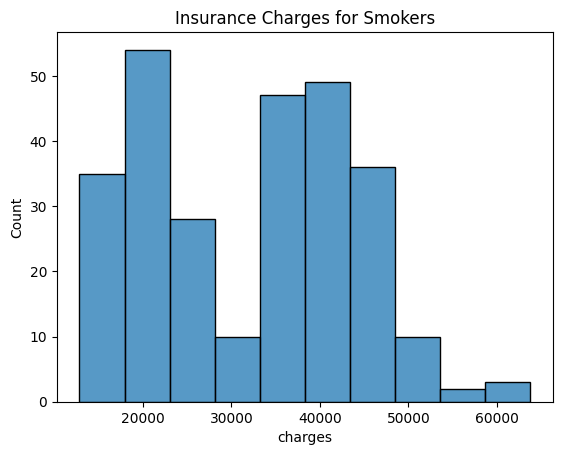

In [ ]:
#Histogram between charges and smokers
sns.histplot(data=smokers, x='charges').set(title='Insurance Charges for Smokers')
plt.show()

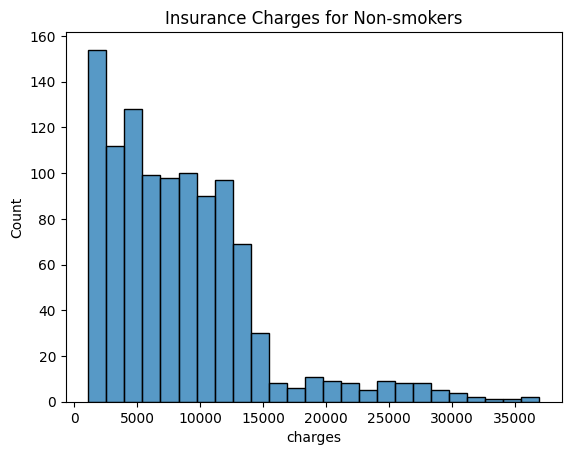

In [ ]:
#Histogram between charges and non-smokers
sns.histplot(data=non_smokers, x='charges').set(title='Insurance Charges for Non-smokers')
plt.show()

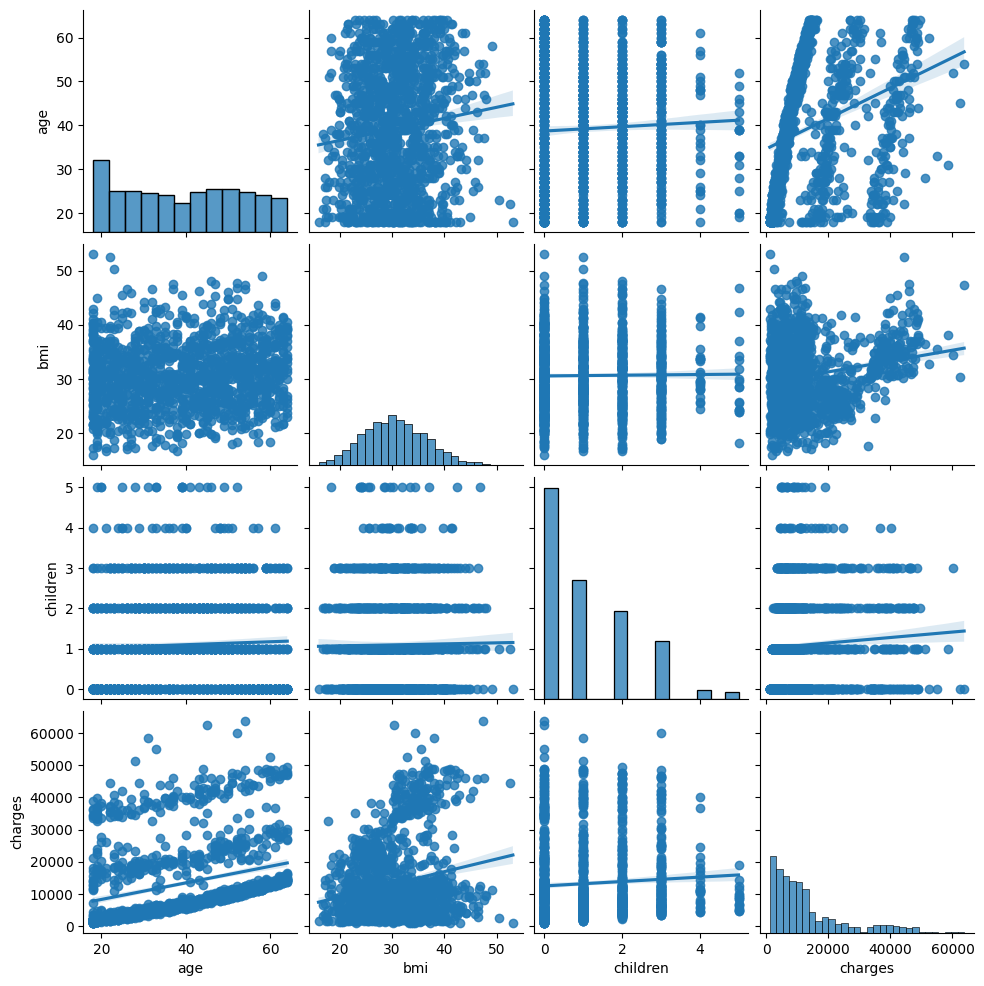

In [ ]:
sns.pairplot(df, kind='reg');

In [ ]:
results_2 = ttest_ind(non_smokers['charges'], smokers['charges'], equal_var = False)

# p-value:
print(f"P-Value: {round(results_2.pvalue,2)}")

# t-statistic:
print(f"T-Statistic:  {round(results_2.statistic,2)}")

P-Value: 0.0
T-Statistic:  -32.75


#Let's breakdown what these results mean:

##If the p-value is less than 0.05, we can reject the null hypothesis of the t-test and conclude that there is a significant difference in mean insurance premiums between smokers and non-smokers.

##For an alpha α=0.05, the t critical values based on the t-table are -1.990 and +1.990.Clearly, the t-statistic -32.75 passed the negative t critical value -1.990, we can reject the null hypothesis.


#**Age Impact on Premium Cost Analysis**

$H_o$: There is no significant difference in the mean insurance premium between people equal to or younger than 30 years old and older than 30 years old.

$H_a$: There is a significant difference in the mean insurance premium between people equal to or younger than 30 years old and older than 30 years old.



In [ ]:
df


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
#Filtering the numerical values is the column 'age' into ages <=30 and >30
equal_under_thirty = df.loc[(df['age'] <= 30)]
above_thirty = df.loc[(df['age'] > 30)]


above_thirty, equal_under_thirty

### Locating and creating dictionaries for values equal to and above 30 as well as below 30

(      age     sex     bmi  children smoker     region      charges
 3      33    male  22.705         0     no  northwest  21984.47061
 4      32    male  28.880         0     no  northwest   3866.85520
 5      31  female  25.740         0     no  southeast   3756.62160
 6      46  female  33.440         1     no  southeast   8240.58960
 7      37  female  27.740         3     no  northwest   7281.50560
 ...   ...     ...     ...       ...    ...        ...          ...
 1329   52    male  38.600         2     no  southwest  10325.20600
 1330   57  female  25.740         2     no  southeast  12629.16560
 1332   52  female  44.700         3     no  southwest  11411.68500
 1333   50    male  30.970         3     no  northwest  10600.54830
 1337   61  female  29.070         0    yes  northwest  29141.36030
 
 [894 rows x 7 columns],
       age     sex     bmi  children smoker     region      charges
 0      19  female  27.900         0    yes  southwest  16884.92400
 1      18    male  3

In [ ]:
# The calculation of mean and STD for those equal to and under the age of 30 as well as for those who are over 30.


equal_under_thirty['charges'].mean()
equal_under_thirty['charges'].std()
above_thirty['charges'].mean()
above_thirty['charges'].std()

print(f'The mean and standard deviation charges of those who are under or equal to thirty is',equal_under_thirty['charges'].mean(),'and',equal_under_thirty['charges'].std(), 'and the mean and standard deviation charges for those above 30 are',above_thirty['charges'].mean(), 'and',above_thirty['charges'].std())


The mean and standard deviation charges of those who are under or equal to thirty is 9397.552051484234 and 11547.927480996415 and the mean and standard deviation charges for those above 30 are 15193.861163199104 and 11926.945045661054


In [ ]:
EUTq1 = np.percentile(equal_under_thirty['charges'], 25)
### BOXPLOT DATA
EUTq3 = np.percentile(equal_under_thirty['charges'], 75)

ATq1 = np.percentile(above_thirty['charges'], 25)
ATq3 = np.percentile(above_thirty['charges'], 75)

EUTq1, EUTq3, ATq1, ATq3

Statistical_Data = [
    ['Equiunder 30 Mean', 'Equiunder 30 STD', 'Equiunder 30 Q1', 'Equiunder 30 Q3', 'Above 30 Mean', 'Above 30 STD', 'Above 30 Q1', 'Above 30 Q3'],
      [equal_under_thirty['charges'].mean(), equal_under_thirty['charges'].std(), EUTq1, EUTq3, above_thirty['charges'].mean(),above_thirty['charges'].std(), ATq1, ATq3]
]
print(tabulate(Statistical_Data))

-----------------  ------------------  ---------------  ---------------  ------------------  ------------------  -----------  ------------------
Equiunder 30 Mean  Equiunder 30 STD    Equiunder 30 Q1  Equiunder 30 Q3  Above 30 Mean       Above 30 STD        Above 30 Q1  Above 30 Q3
9397.552051484234  11547.927480996415  2156.484225      15892.3154       15193.861163199104  11926.945045661054  7418.760975  18796.543527499998
-----------------  ------------------  ---------------  ---------------  ------------------  ------------------  -----------  ------------------


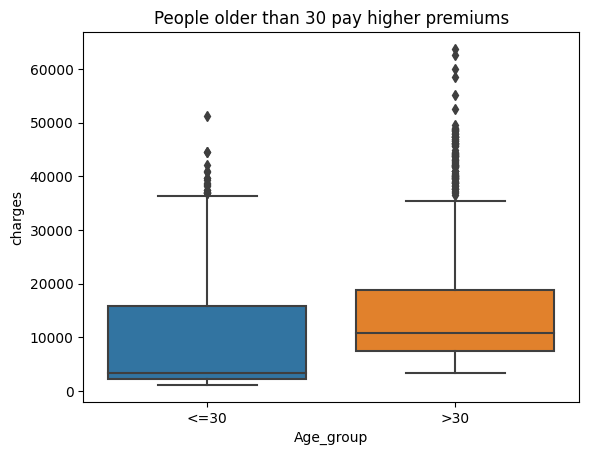

In [ ]:

# Create a boxplot to show the premiums differences between the two age groups
df.loc[df['age'] <= 30, 'Age_group'] = "<=30"
df.loc[(df['age'] > 30), 'Age_group'] = ">30"
sns.boxplot(data=df, x='Age_group', y='charges', ).set(title='People older than 30 pay higher premiums');

[Text(0.5, 1.0, 'Ages <= 30 in relation to premiums')]

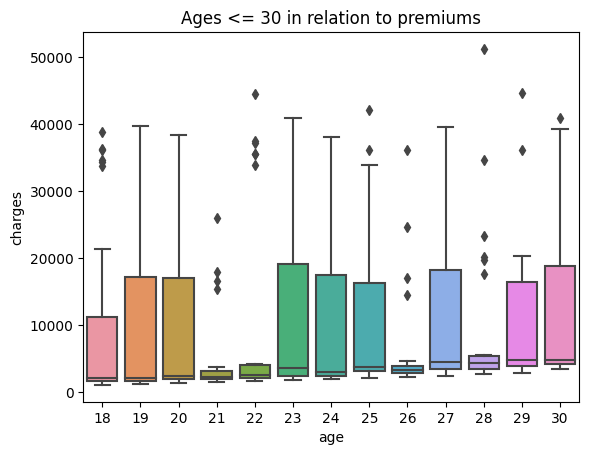

In [ ]:
#Boxplot between charges and ages less than or equal to 30
sns.boxplot(x='age', y='charges', data=equal_under_thirty).set(title='Ages <= 30 in relation to premiums')



[Text(0.5, 1.0, 'Ages > 30 in relation to premiums')]

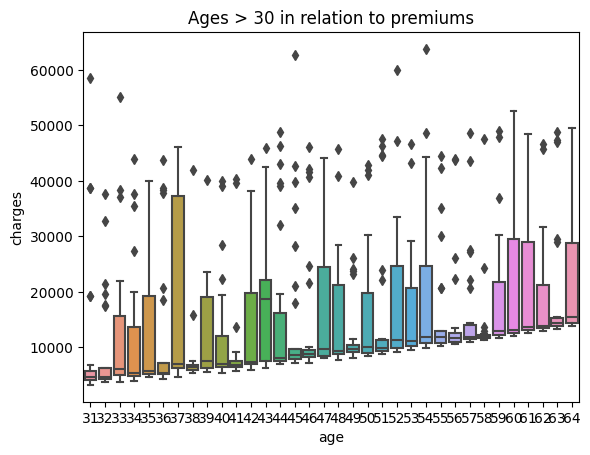

In [ ]:
#Boxplot between charges and ages greater than 30
sns.boxplot(x='age', y='charges', data=above_thirty).set(title='Ages > 30 in relation to premiums')


In [ ]:
frame1 = pd.DataFrame(equal_under_thirty)
frame1

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
10,25,male,26.220,0,no,northeast,2721.32080
12,23,male,34.400,0,no,southwest,1826.84300
...,...,...,...,...,...,...,...
1328,23,female,24.225,2,no,northeast,22395.74424
1331,23,female,33.400,0,no,southwest,10795.93733
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


In [ ]:
frame2 = pd.DataFrame(above_thirty)
frame2

,age,sex,bmi,children,smoker,region,charges
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
...,...,...,...,...,...,...,...
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830


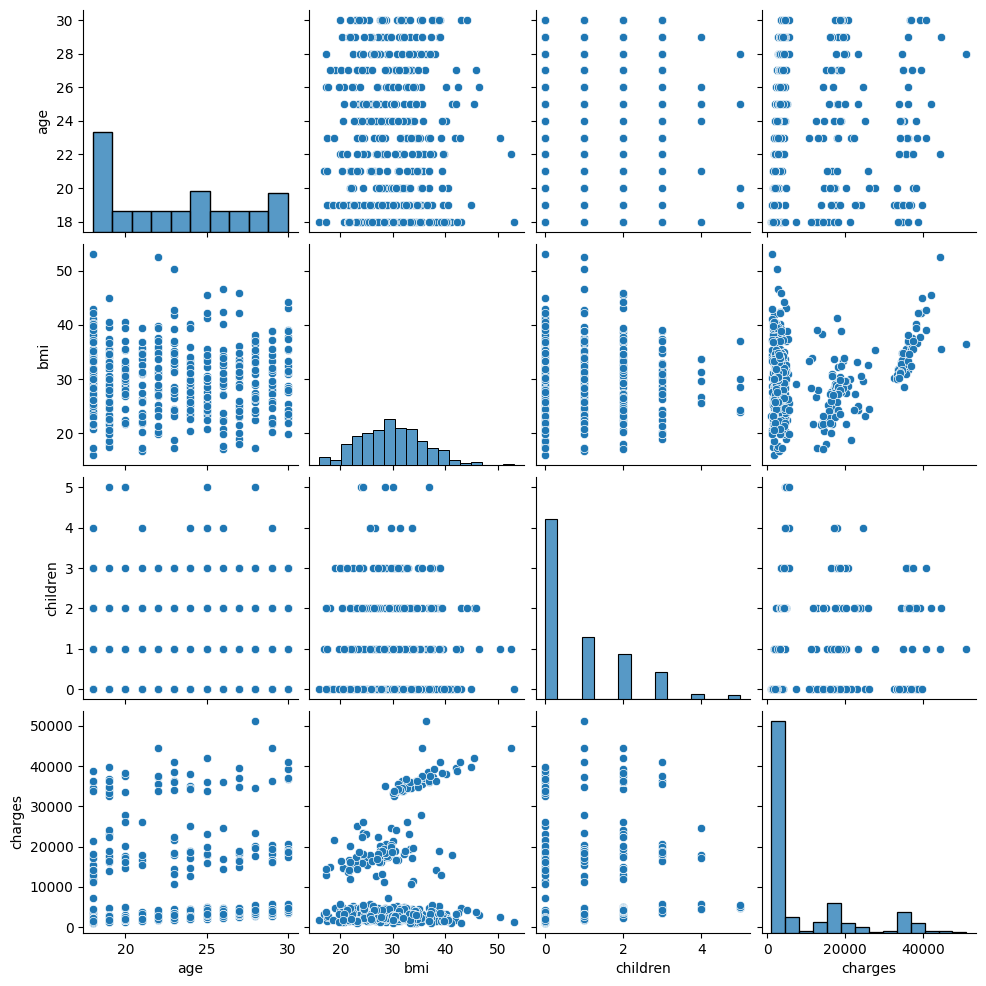

In [ ]:
#PLACEHOLDER FOR PAIR PLOT.
frame1 = pd.DataFrame(equal_under_thirty)
frame2 = pd.DataFrame(above_thirty)

sns.pairplot(frame1)


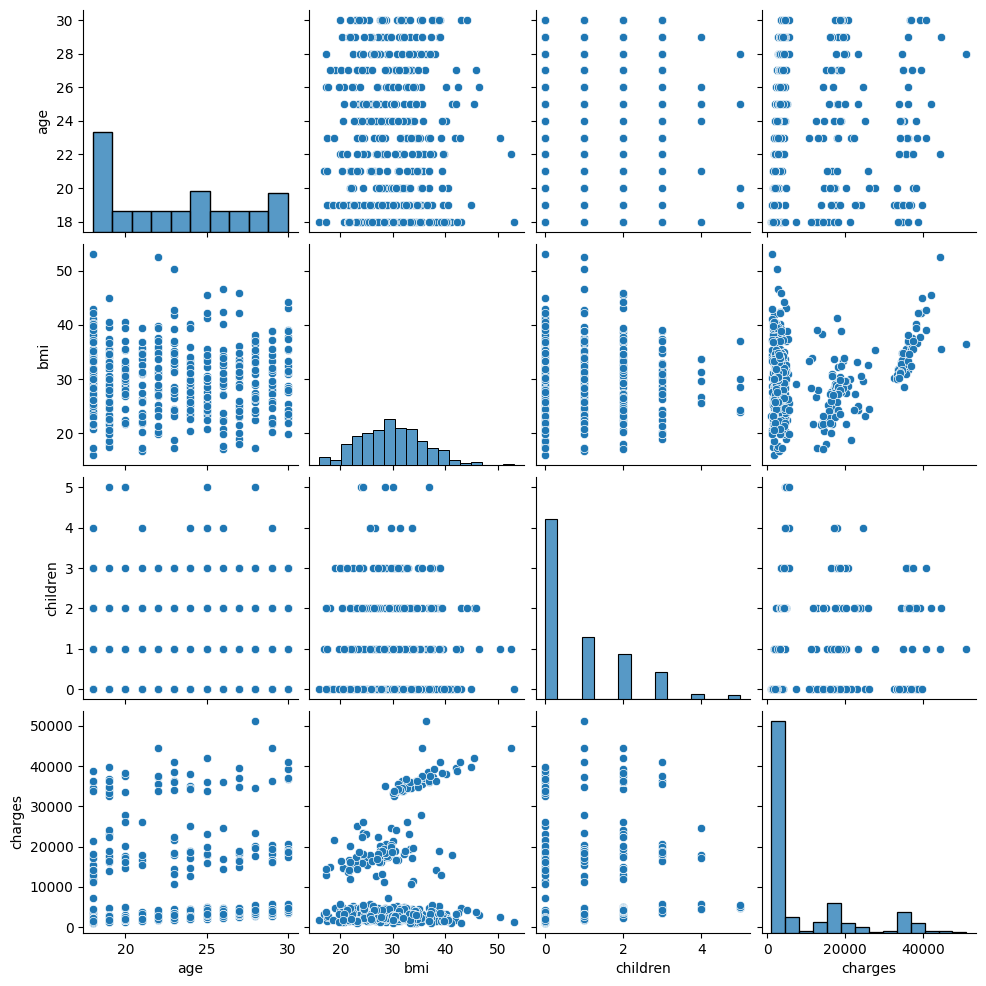

In [ ]:
sns.pairplot(frame1)

In [ ]:
# T-test for Age Impact on Premium Cost Analysis
results_1 = ttest_ind(frame1['charges'], frame2['charges'])
# p-value:
print(f"P-Value: {results_1.pvalue:.2f}")
# t-statistic:
print(f"T-Statistic:  {round(results_1.statistic,2)}")



P-Value: 0.00
T-Statistic:  -8.46


#Let's breakdown what these results mean:

## If the p-value is less than 0.05, we can reject the null hypothesis of the t-test and conclude that there is a significant difference in the mean insurance premium between people equal to or younger  than 30 years old and older than 30 years old.

##For an alpha α=0.05, the t critical values based on the t-table are -1.990 and +1.990.Clearly, the t-statistic -8.46 passed the negative t critical value -1.990, we can reject the null hypothesis.


##According to the data provided, we have reasonable evidence to reject the null hypothesis on those equal to and under the age of 30 compared to those above the age of 30. All statistical values for those above 30 are higher than those of which that are under. Based on the graph we can see that while there is very small change visible there is an increasing mean in the costs of premiums according to age. It is heavily apparent when it comes to those above the age of 30 due to the higher amount of data.

#**Final Project Report**

##Our group decided to analyze the US healthcare dataset. Upon viewing the dataset, we decided to analyze whether smokers pay a higher insurance premium than non-smokers and whether people greater than 30 years of age pay higher insurance premiums than sub-30-year-olds. Our research aims to investigate the impact of age and smoking on US Health Insurance Premiums. In this data analysis project, we used a range of robust methods to analyze two distinct hypotheses related to insurance premiums. Focusing on the smoking analysis, we filtered the data into "smokers" and "non-smokers" categories. Our visualization strategies included the use of a boxplot with charges categorized by smoking status on the x-axis and charges on the y-axis. Additionally, we created two separate histograms, providing a visual understanding of the distribution of charges for smokers and non-smokers. Although the visual data strongly supported our hypothesis, we further substantiated our findings by calculating the t-statistic and p-value. In regards to the age analysis, we strategically extracted data from the 'age' column, distinguishing values above 30 from those equal to or less than 30. We achieved visual representation through two separate boxplots, one for those 30 and under and another for those above 30. Each boxplot illustrated the relationship between 'age' on the x-axis and 'charges' on the y-axis. The calculation of the p-value and t-statistic reinforced our findings. Analyzing the results, the p-values fell below 0.05 in both instances, leading to the rejection of our null hypotheses. In addition to this, our data revealed evidence supporting higher premiums for individuals aged 30 and above. Visual representations highlight the same trend, emphasizing the importance of age and smoking habits in determining insurance costs. However, we faced a few significant challenges during our journey, especially in regards to organizational habits. One of the most significant challenges was coordinating schedules among our three team members. With balancing academic obligations, such as exams and assignments from other classes, coordinating schedules proved to be a rather complex task. However, despite the varying availability, the three of us were able to communicate effectively and come together. Another challenge we faced was figuring out the direction in which we wanted to analyze the data. With the absence of a rubric or examples to guide our approach, my teammates and I were left with no option but to engage in critical thinking to determine the most effective and insightful methods. This required much careful consideration. Additionally, we had to assess our chosen methods to ensure our approach would yield proper and meaningful results. Moving forward, we have learned to emphasize a focus on effective communication and diligent planning.
